<a href="https://colab.research.google.com/github/m0rt3z4/nQueensWithGeneticAlgorithm/blob/main/nQueens_with_Genetic_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Required Libraries 

In [1]:
from datetime import datetime
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Start Measuring Execution Time
 

In [2]:
start_time = datetime.now()

# Setup Algorithm Parameters

In [3]:
n_queens = 8
n_population = 10
max_iteration = 5000
cross_over_percent = 0.7
mutation_percent = 0.2

# Initialize Variables

In [4]:
n_cross_over = 2 * round(n_population * cross_over_percent / 2)
n_mutation = round(n_population * mutation_percent)
n_reproduction = n_population - n_cross_over - n_mutation

# Define Algorithm Containers

In [5]:
population = []
cross_over_population = []
mutation_population = []
reproduction_population = []

# Define Plot Containers

In [6]:
best_individuals_cost = []
average_individuals_cost= []

# Evaluation Function

In [7]:
def evaluate(chromosome):
  cost = 0
  for i in range(0, len(chromosome) - 1):
    for j in range(i + 1, len(chromosome)):
      if abs(i - j) == abs(chromosome[i] - chromosome[j]):
        cost += 1        
  return cost

# Unique The Union Of Two Sets 

In [8]:
def unique_union(first, second):
  union = np.concatenate([first, second])
  _, unique_index = np.unique(union, return_index=True)
  return union[np.sort(unique_index)]

# CrossOver Function

In [9]:
def fill_cross_over_population(population, cross_over_population, n_cross_over):
  fitness = [1 / individual.cost for individual in population]
  probability_of_fitness = [element / sum(fitness) for element in fitness]
  cumsum_fitness = np.cumsum(probability_of_fitness)
  for i in range(0, n_cross_over, 2):
    first_random_fitness, second_random_fitness = np.random.rand(), np.random.rand()
    while first_random_fitness == second_random_fitness: second_random_fitness = np.random.rand()
    first_parent_position = np.where(first_random_fitness <= cumsum_fitness)[0][0]
    second_parent_position = np.where(second_random_fitness <= cumsum_fitness)[0][0]

    first_parent = population[first_parent_position].chromosome
    second_parent = population[second_parent_position].chromosome

    chromosome_length = len(first_parent)
    intersectionـpoint = np.random.randint(chromosome_length)

    first_offspring = np.concatenate([first_parent[:intersectionـpoint], second_parent[intersectionـpoint:]])
    second_offspring = np.concatenate([second_parent[:intersectionـpoint], first_parent[intersectionـpoint:]])

    first_offspring = unique_union(first_offspring, np.random.permutation(chromosome_length) + 1)
    second_offspring = unique_union(second_offspring, np.random.permutation(chromosome_length) + 1)

    cross_over_population.append(Individual(first_offspring, evaluate(first_offspring))) 
    cross_over_population.append(Individual(second_offspring, evaluate(second_offspring)))

# Mutation Function

In [10]:
def fill_mutation_population(population, mutation_population, n_mutation):
  for i in range(0, n_mutation):
    chromosome = population[np.random.randint(len(population))].chromosome
    first_index = np.random.randint(len(chromosome)-1)
    second_index = np.random.randint(first_index+1, len(chromosome))
    chromosome[first_index], chromosome[second_index] = chromosome[second_index], chromosome[first_index]
    mutation_population.append(Individual(chromosome, evaluate(chromosome)))

# Generate First Population

In [11]:
chromosomes = [np.random.permutation(n_queens) + 1 for i in range(n_population)]
Individual = namedtuple('Individual', ['chromosome', 'cost'])
population = [Individual(chromosome, evaluate(chromosome)) for chromosome in chromosomes]
population = sorted(population, key=lambda individual: individual.cost)

# Main Loop

In [12]:
best_individual = population[0]
iteration_count = 0
while best_individual.cost > 0 and iteration_count <= max_iteration:
  iteration_count += 1
  cross_over_population = []
  fill_cross_over_population(population, cross_over_population, n_cross_over)
  mutation_population = []
  fill_mutation_population(population, mutation_population, n_mutation)
  reproduction_population = [population[index] for index in range(n_reproduction)]
  population = reproduction_population + cross_over_population + mutation_population
  population = sorted(population, key=lambda individual: individual.cost)
  best_individual = population[0]
  best_individuals_cost.append(best_individual.cost)
  average_individuals_cost.append(np.mean([individual.cost for individual in population]))
  print(f'Best individual in iteration#{iteration_count:03d} is {best_individual.chromosome} with cost {best_individual.cost}')

Best individual in iteration#001 is [5 4 2 1 8 6 3 7] with cost 3
Best individual in iteration#002 is [7 4 2 1 8 6 5 3] with cost 2
Best individual in iteration#003 is [7 4 2 1 8 6 5 3] with cost 2
Best individual in iteration#004 is [7 4 2 1 8 6 5 3] with cost 2
Best individual in iteration#005 is [7 4 2 3 8 6 5 1] with cost 2
Best individual in iteration#006 is [3 4 8 1 5 6 2 7] with cost 2
Best individual in iteration#007 is [6 4 2 8 5 3 1 7] with cost 1
Best individual in iteration#008 is [6 4 2 8 5 3 1 7] with cost 1
Best individual in iteration#009 is [6 4 1 8 5 3 2 7] with cost 1
Best individual in iteration#010 is [7 4 2 8 5 3 1 6] with cost 1
Best individual in iteration#011 is [6 4 1 8 5 3 2 7] with cost 1
Best individual in iteration#012 is [7 4 2 8 5 3 1 6] with cost 1
Best individual in iteration#013 is [7 4 2 8 5 3 1 6] with cost 1
Best individual in iteration#014 is [7 4 2 8 5 1 3 6] with cost 1
Best individual in iteration#015 is [7 4 1 8 5 3 6 2] with cost 1
Best indiv

# Plot Best Cost & Mean Cost

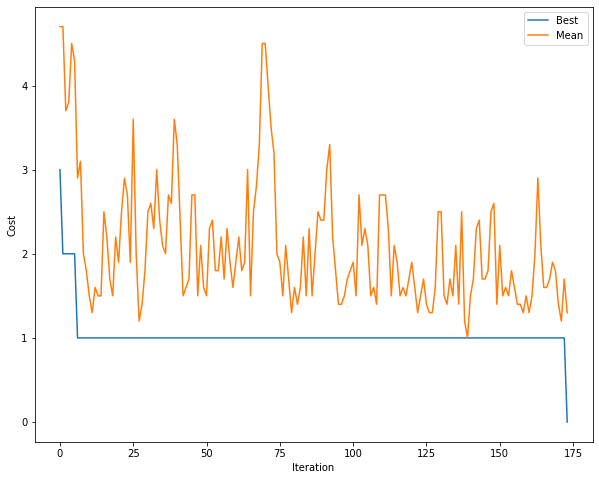

In [13]:
plt.figure(figsize=[10, 8])
plt.xlabel("Iteration");
plt.ylabel("Cost");

plt.plot(np.arange(0, len(best_individuals_cost)), best_individuals_cost, label='Best');
plt.plot(np.arange(0, len(average_individuals_cost)), average_individuals_cost, label='Mean');
plt.legend();

# Algorithm Execution Time

In [14]:
end_time = datetime.now() - start_time
print(f'Elapsed Time {end_time}')

Elapsed Time 0:00:00.755207
